In [ ]:
Data loading and cleaning:
Load the CSV file, clean column names, convert columns to numeric, and remove missing values.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('2019.csv')
df.columns = df.columns.str.strip()

In [73]:
numeric_cols = [
    'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy',
    'Freedom to make life choices', 'Generosity', 'Perceptions of corruption'
]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df = df.dropna()

Data exploration:
Display the first rows and column types to understand the structure and content of the DataFrame.

In [62]:
print("First 10 rows of the DataFrame:")
print(df.head(10))

First 10 rows of the DataFrame:
   Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   
5             6       Switzerland  7.480           1.452           1.526   
6             7            Sweden  7.343           1.387           1.487   
7             8       New Zealand  7.307           1.303           1.557   
8             9            Canada  7.278           1.365           1.505   
9            10           Austria  7.246           1.376           1.475   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596   

In [63]:
print("\nDataFrame info:")
print(df.info())


DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB
None


In [66]:
# Check again
print("\nFirst 10 rows after cleaning:")
print(df.head(10))
print("\nDataFrame info after cleaning:")
print(df.info())


First 10 rows after cleaning:
   Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   
5             6       Switzerland  7.480           1.452           1.526   
6             7            Sweden  7.343           1.387           1.487   
7             8       New Zealand  7.307           1.303           1.557   
8             9            Canada  7.278           1.365           1.505   
9            10           Austria  7.246           1.376           1.475   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596    

By inspecting the structure, I see the DataFrame has 156 rows (countries) and 9 columns, including country names, overall rank, and key numeric indicators like happiness score, GDP per capita, social support, healthy life expectancy, freedom, generosity, and perceptions of corruption—all ready for quantitative analysis.

Histogram of happiness scores:
Visualize the distribution of happiness scores across all countries.

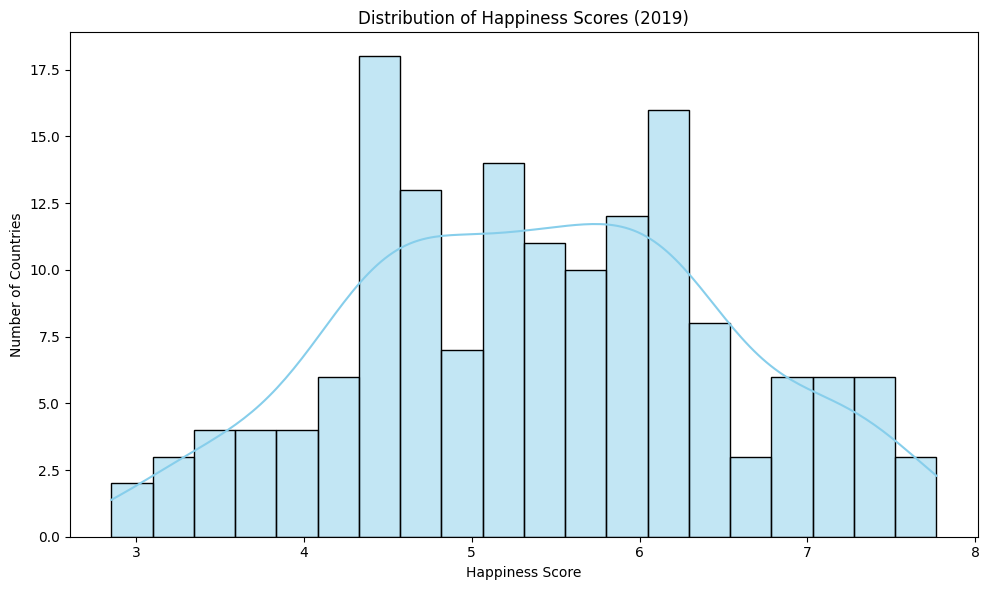

In [74]:
plt.figure(figsize=(10,6))
sns.histplot(df['Score'], bins=20, kde=True, color='skyblue')
plt.xlabel('Happiness Score')
plt.ylabel('Number of Countries')
plt.title('Distribution of Happiness Scores (2019)')
plt.tight_layout()
plt.show()

Histogram of happiness scores:
Most countries have happiness scores between 4 and 7, showing a moderate global happiness level.

Scatter plot GDP vs. happiness:
Show the relationship between GDP per capita and happiness score for each country.

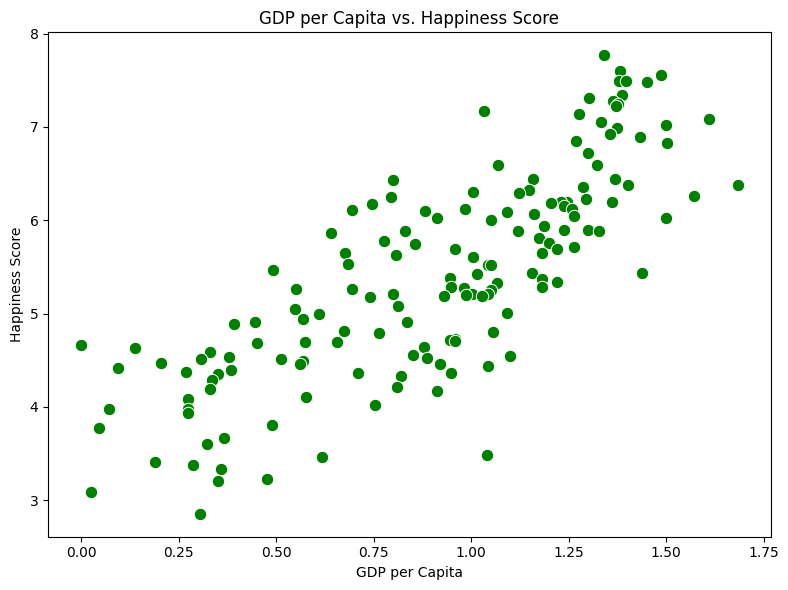

In [76]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='GDP per capita', y='Score', color='green', s=80)
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.title('GDP per Capita vs. Happiness Score')
plt.tight_layout()
plt.show()

Scatter plot GDP vs. happiness:
There is a positive relationship between GDP per capita and happiness score—richer countries tend to be happier.

Boxplot by happiness quartile:
Compare healthy life expectancy across countries grouped by happiness score quartiles.

/var/folders/xh/330hhznn65g8ndgfy8rh7gkw0000gn/T/ipykernel_67310/832788139.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Score_quartile', y='Healthy life expectancy', palette='Set2')


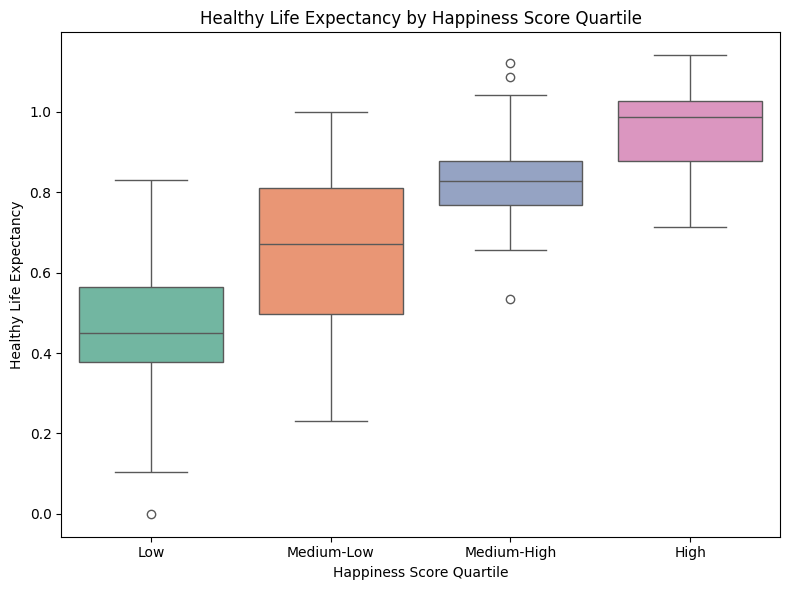

In [82]:
df['Score_quartile'] = pd.qcut(df['Score'], 4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])

plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Score_quartile', y='Healthy life expectancy', palette='Set2')
plt.xlabel('Happiness Score Quartile')
plt.ylabel('Healthy Life Expectancy')
plt.title('Healthy Life Expectancy by Happiness Score Quartile')
plt.tight_layout()
plt.show()

Boxplot by happiness quartile:
Countries with higher happiness scores generally have higher healthy life expectancy.

Correlation heatmap:
Display the correlations between all main happiness factors as a heatmap.

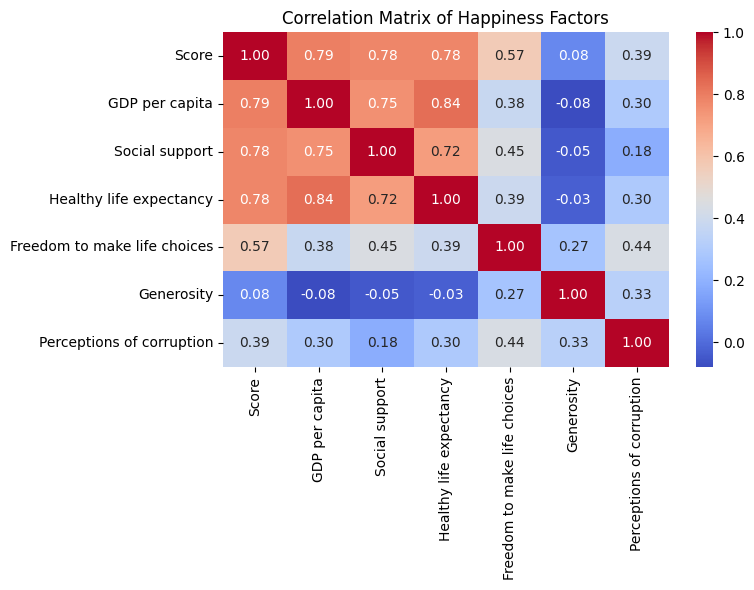

In [90]:
plt.figure(figsize=(8,6))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Happiness Factors')
plt.tight_layout()
plt.show()

Correlation heatmap:
Happiness score is most strongly correlated with GDP per capita, social support, and healthy life expectancy.

. Pairplot: Explore Relationships Between All Factors

/var/folders/xh/330hhznn65g8ndgfy8rh7gkw0000gn/T/ipykernel_67310/3595192715.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


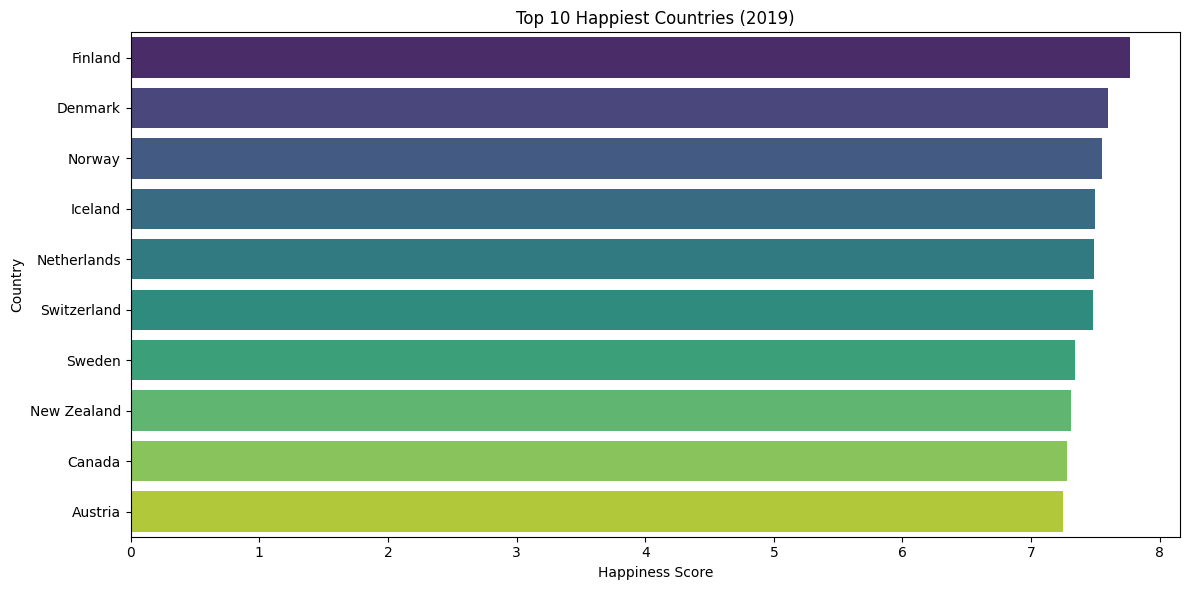

In [91]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=top10,
    x='Score',
    y='Country or region',   # On inverse X et Y pour un barplot horizontal
    palette='viridis'
)
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.title('Top 10 Happiest Countries (2019)')
plt.tight_layout()
plt.show()

Pairplot of all factors:
The main happiness factors are positively related to each other, especially GDP, social support, and health.

Top 10 happiest countries barplot:
Highlight and compare the happiness scores of the ten happiest countries.

/var/folders/xh/330hhznn65g8ndgfy8rh7gkw0000gn/T/ipykernel_67310/1971347834.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x='Country or region', y='Score', palette='viridis')


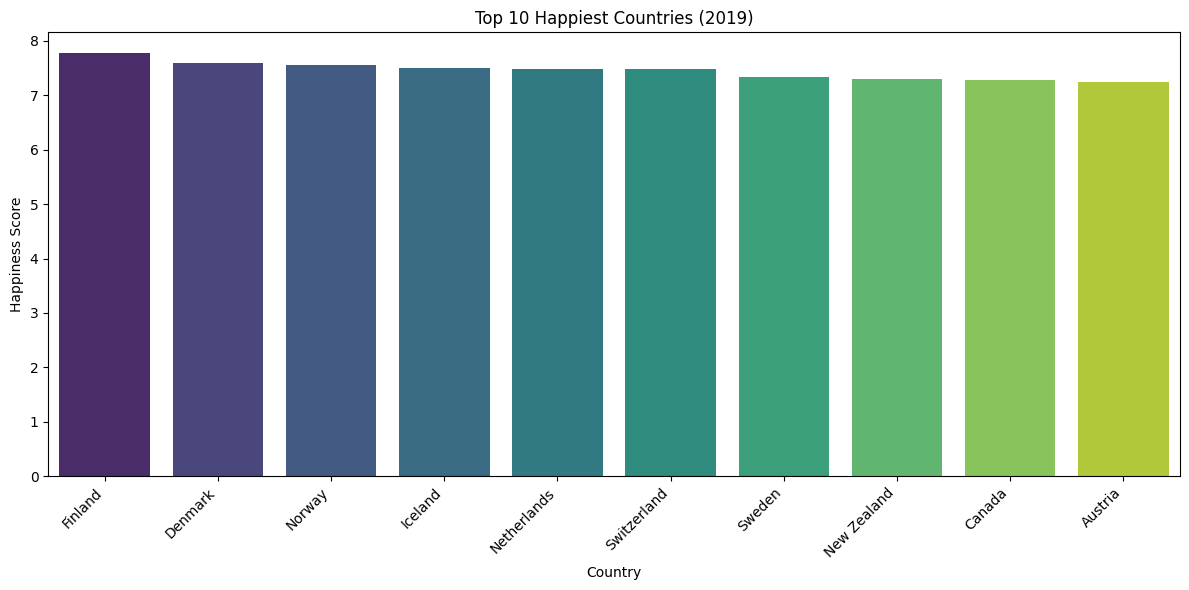

In [85]:
top10 = df.sort_values('Score', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top10, x='Country or region', y='Score', palette='viridis')
plt.ylabel('Happiness Score')
plt.xlabel('Country')
plt.title('Top 10 Happiest Countries (2019)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Top 10 happiest countries barplot:
Highlight and compare the happiness scores of the ten happiest countries.

Violin plot social support by quartile:
Show the distribution of social support within each happiness score quartile.

/var/folders/xh/330hhznn65g8ndgfy8rh7gkw0000gn/T/ipykernel_67310/4070692593.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Score_quartile', y='Social support', palette='pastel')


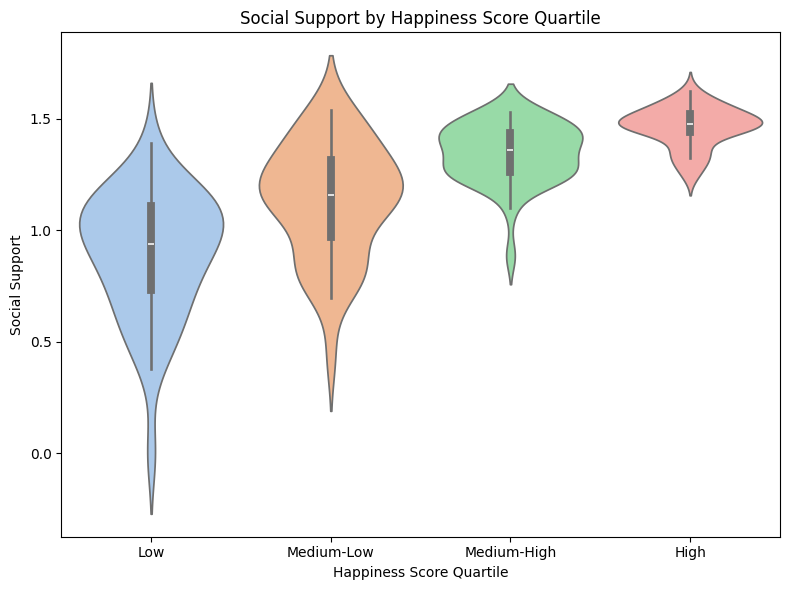

In [87]:
plt.figure(figsize=(8,6))
sns.violinplot(data=df, x='Score_quartile', y='Social support', palette='pastel')
plt.xlabel('Happiness Score Quartile')
plt.ylabel('Social Support')
plt.title('Social Support by Happiness Score Quartile')
plt.tight_layout()
plt.show()

Violin plot social support by quartile:
Show the distribution of social support within each happiness score quartile.

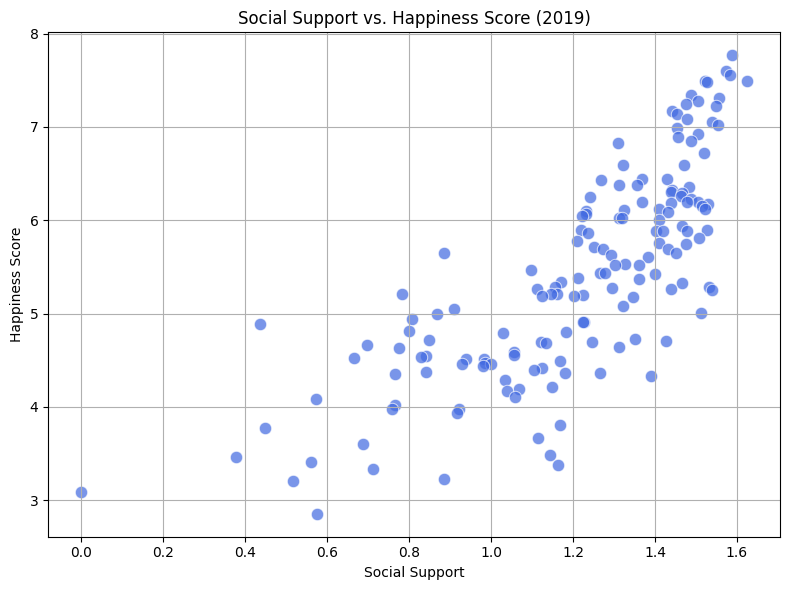

In [88]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Social support', y='Score', color='royalblue', s=80, alpha=0.7)
plt.xlabel('Social Support')
plt.ylabel('Happiness Score')
plt.title('Social Support vs. Happiness Score (2019)')
plt.grid(True)
plt.tight_layout()
plt.show()